Eun Ju Jong

In [68]:
# Base Jupyter Notebook for Unit Project Three, Part One
# TODO: Add your initials to the end of the project name/filename

In [69]:
# Standard imports from prior machine learning notebooks
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [70]:
# Additional imports and settings needed for this notebook
import os

# To plot pretty figures
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

In [71]:
"""
The goal of this notebook is to explore the application of machine learning, and
linear regression in particular, to a larger dataset than we have been working
with in class and one that has broader variety in its features, thus requiring
new techniques.
"""

'\nThe goal of this notebook is to explore the application of machine learning, and\nlinear regression in particular, to a larger dataset than we have been working\nwith in class and one that has broader variety in its features, thus requiring\nnew techniques.\n'

In [72]:
"""
Dataset: California Housing Dataset collected from the 1990 California census
Unlike our other datasets, this one includes raw data which hasn't been cleansed
This data has been provided in a csv file named "housing.csv". Make sure this
file is in the same folder as this .ipynb file before proceeding
"""

# load housing data from csv file
import pandas as pd
housing = pd.read_csv("housing.csv")

In [73]:
# check how many instances we have and how many features there are
housing.shape

(20640, 10)

In [74]:
# view the first five entries in the dataset
housing.head()

# Notice that a row does not correspond to a single house - if it did, the first example would be
# an 888 room house with 129 bedrooms! Each example is for a different district in California.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


"""
TODO: From within Jupyter Notebook, also open the housing.csv file. Observe how the data
in the raw file corresponds to the data in this table.

To do this, when on the Jupyter screen where you can see your files and notebooks listed, click
on "housing.csv" to open it in a browser tab, the same way you would with a notebook or python file.
Observe that you can view the raw format of the file this way. You can also open a .csv file in
Excel (your computer likely defaults to doing this if you double click the file from in the File
Explorer). But Excel adds formatting and hides the commas separating columns. It can also hide
special characters such as letters with accents over them.
"""

$\rightarrow$ The columns of data in the raw file are separated by commas. The csv format of the raw data file already indicates that the file contains "comma-separated-values."

In [75]:
# print out a summary of the data within each feature (column)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


"""
QUESTION: Which features seem to differ in an interesting way from the others? How so?

ANSWER: Ocean_proximity is the only type object variable. Also, total_bedrooms has only 20433 entries, which is less by 207 entries compared to the other variables. 
"""

In [76]:
# housing["ocean_proximity"] is the column with just the values for that feature
# applying .value_counts() to that feature adds up how many times each of its values occurs
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [77]:
# get descriptive statistics for each of the features in our dataset
housing.describe()

# In addition to the number of non-null values for that feature, we can see the mean value, the
# standard deviation, the minimum and maximum values encountered, and the thresholds for the 25th,
# 50th, and 75th percentile cutoffs in the data (the values at which the indicated percent of
# the data are less than that value).

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


"""
QUESTION: Which feature seems to have the most variation in the types of values it takes on? Explain.

ANSWER: Looking at the standard deviation (std) of the features, we can see that the std of total_rooms, total_bedrooms, population, households, and median_house_value are large in comparison to the other features. Note that std is a measure of the amounto of dispersion of a set of values. That is, the listed featues above have large variation in data values, and we can confirm this by looking at the range of values of these variables by calculating (max-min).
"""

bins = 10


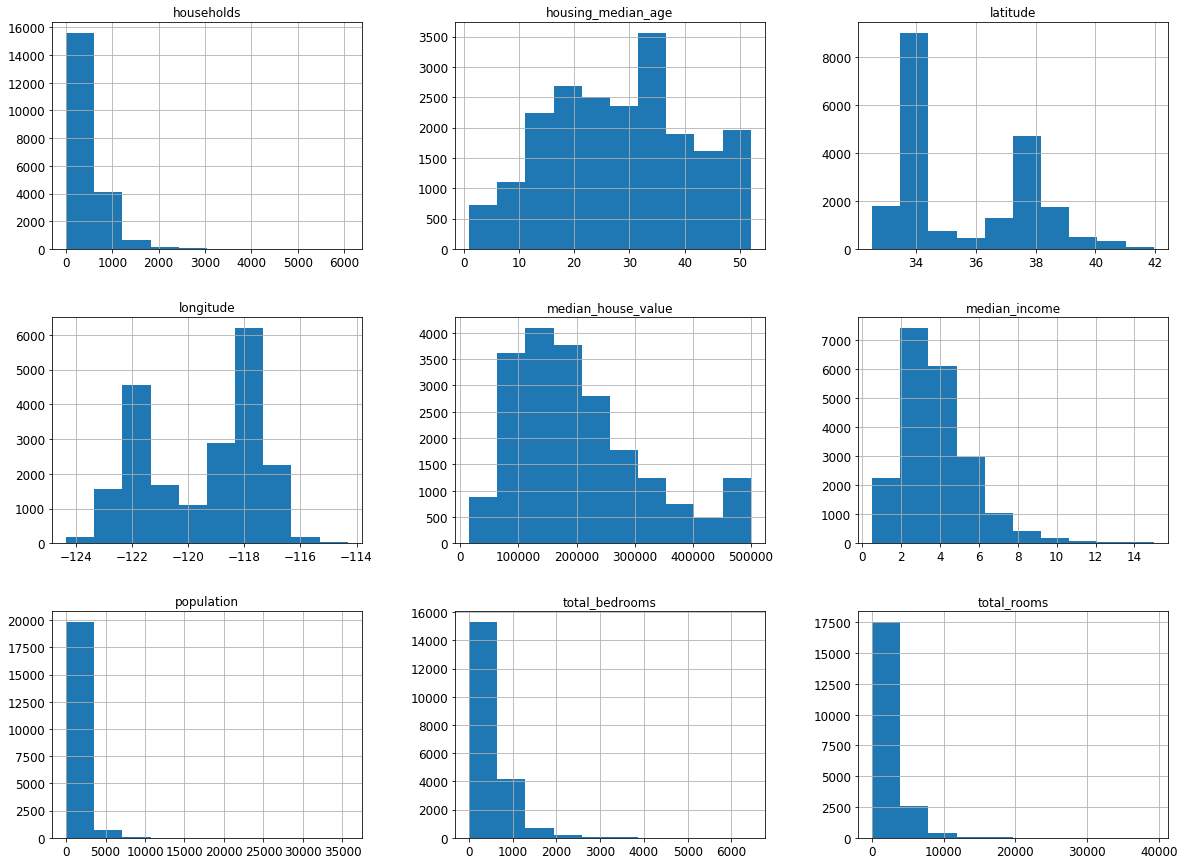

bins = 25


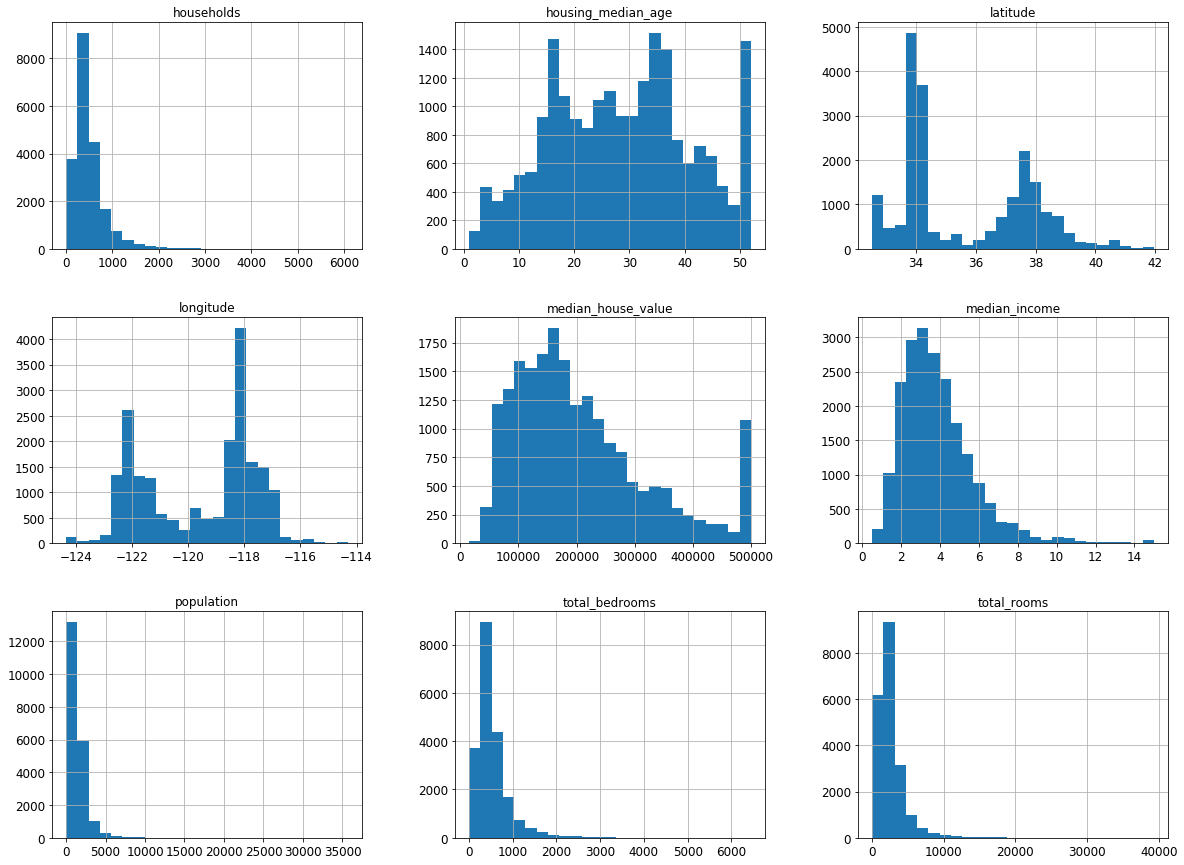

bins = 50


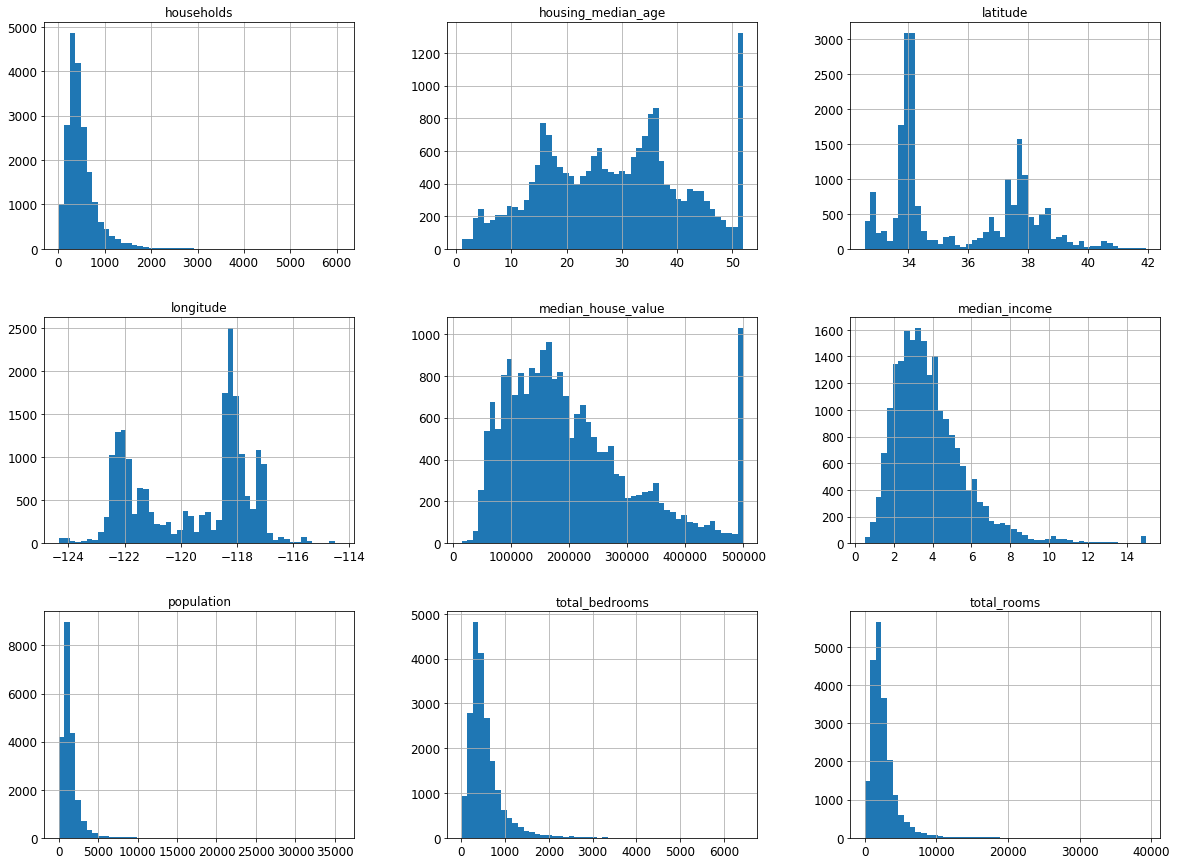

bins = 75


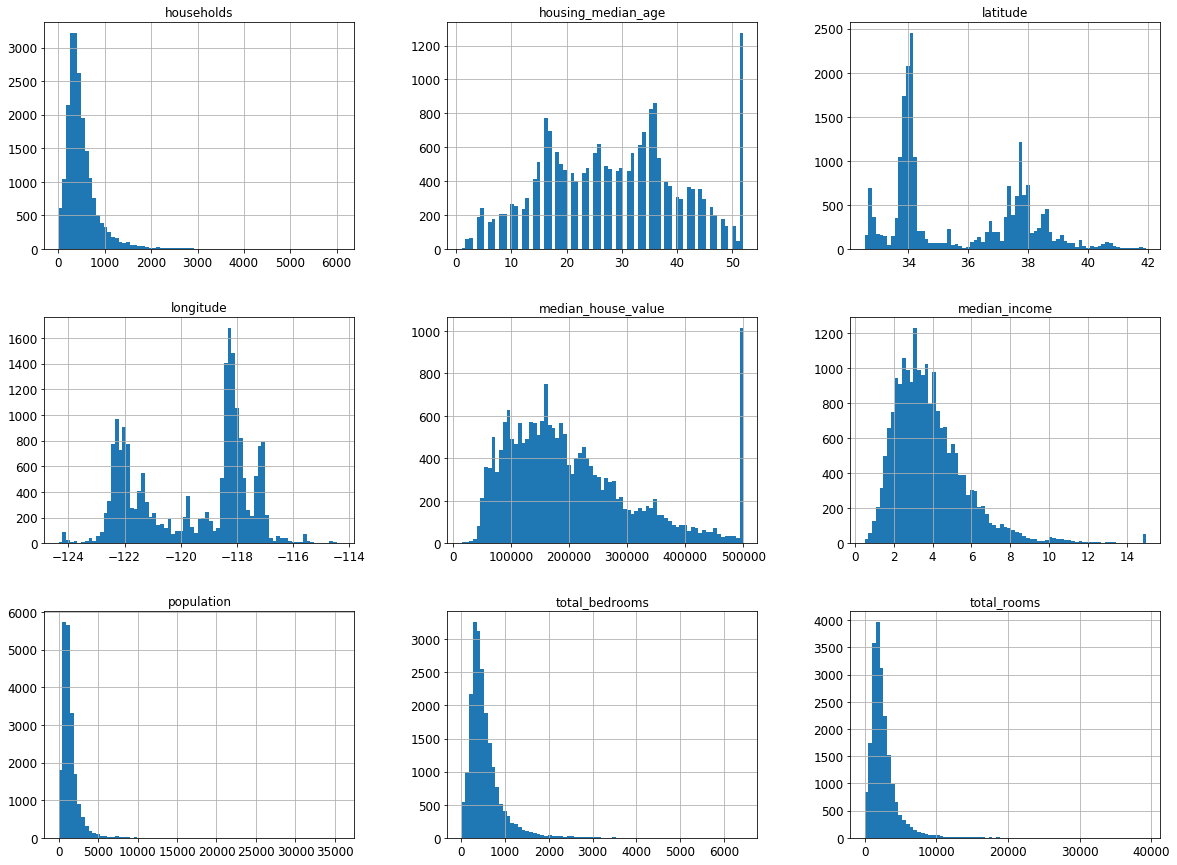

bins = 100


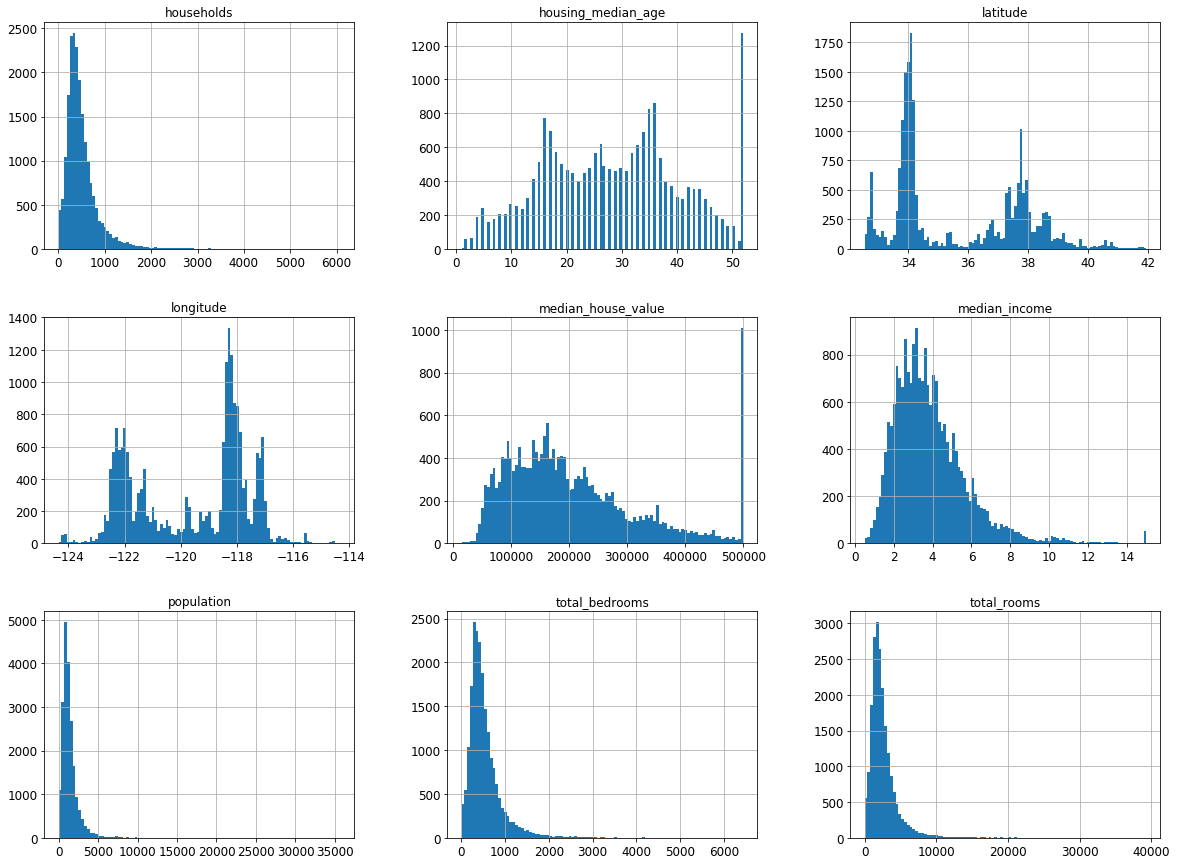

In [78]:
# We can also try to understand the data we are working with by viewing a histogram of the
# values within each feature.
for i in [10, 25, 50, 75, 100]:
    housing.hist(bins=i, figsize=(20,15))
    print("bins = " + str(i))
    plt.show()

"""
TODO: Experiment with changing the number of "bins" drawn in the histogram (here set to 50
to start) to larger and smaller values.

QUESTION: What seems to be a good value for "bins"?

ANSWER: I think that the detrmination of the number of bins depends on what you try to identify from the graphs. If you want to look at the trend over time, then larger number of bin would provide a more precise tren line compared to smaller bin counts. This is because the size of the bins is the number of equal-width bins within the given range of the x-axis. On the other hand, if you are interested in looking at housing values at different input ranges, then selcting the number of bins at a mid-range might be a good choice because too small bin counts will provide an average housig price in a comparatively large input range and too large bin counts will make it hard to visually match input and output values. With the given bin sizes above, I think that the number of bins of 50 allows us to see the overall trend and identify input/output pairs comfortably. 

QUESTION: Why do smaller values for "bins" lead to the histograms providing less useful information?

ANSWER: Considering the fact that the values for bins determines the number of equal-width bins of a histogram, smaller values for bins will only allow us to see a generalized trend of the data because we will not get enough differentiation between values, which neglects any fluctuations that could appear on a histogram with larger numbers of bins. That is, with larger values for bins, we will have a more precisely trend and we can idetify any specific values that may be present within the range. 

QUESTION: Why do larger values for "bins" lead to the histographs providing less useful information?

ANSWER: Considering the fact that the values for bins determines the number of equal-width bins of a histogram, too largers values for bins will generate a histogram with too many bins. The trend line could be precise, but it will be difficult to identify corresponding input and output pairs. Also, too many bins could provide information in a misleading way such that we might catch peaks or troughs that appear by chance. 

"""

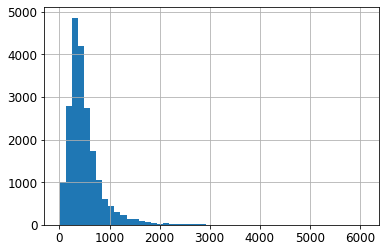

In [79]:
housing["households"].hist(bins=50)

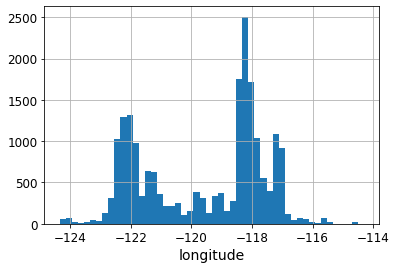

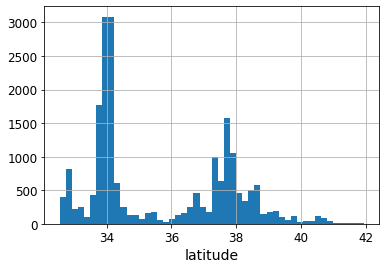

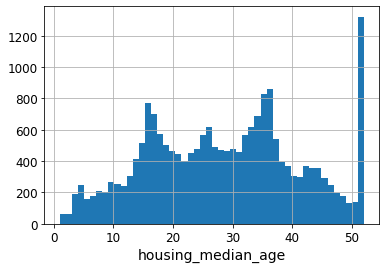

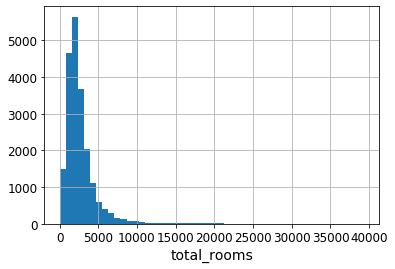

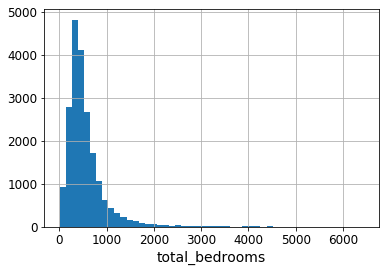

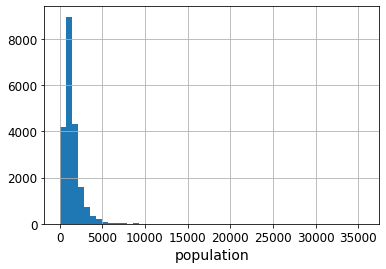

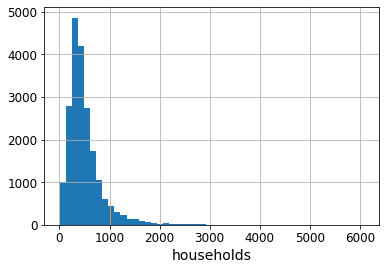

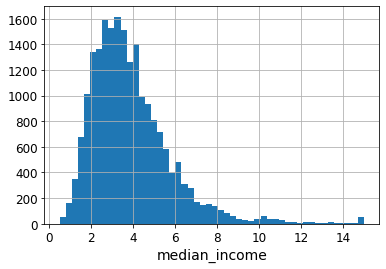

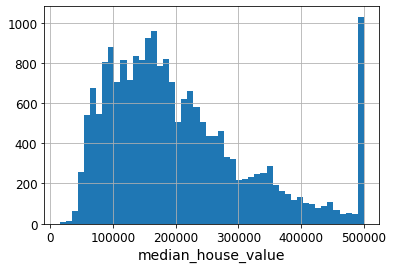

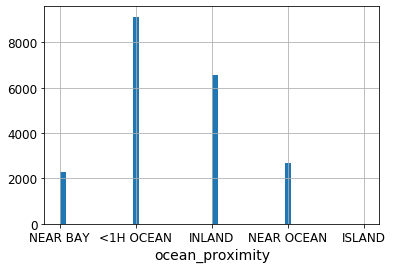

In [80]:
# You can also just show a single histogram for one feature by selecting the
# column for the feature you are interested in and applying the .hist() function
# to it rather than to the entire dataset.
for i in [row for row in housing]:
    housing[i].hist(bins=50)
    plt.xlabel(i)
    plt.show()

"""
QUESTION: How are these histograms telling us that two of our features store values for which a maximum
possible value was set? Which features are those?

ANSWER: housing_median_age and median_house_value/ It is assumable that the housing median age and median house value in CA may each exceed approximately 50 years and $500,000. The extreme outliers of these two features may indicate the maximum value set for these observations. 

QUESTION: How are these histograms telling us that for some of our features, most of the values are
close together with a small number of extreme outliers? Which features are these? (Note: these will
be the histograms we call "tail heavy".)

ANSWER: housing_median_age, median_income, median_house_value/ We can see that these features all have high values that do not fall near any other data points on the graphs and fall apart from the other data points. Outliers in the low ranges are not spotted in any of these histograms. 

"""

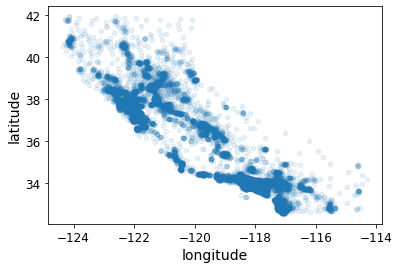

In [81]:
# Because the dataset includes latitude and longitude data, we can plot it as if it were on
# a map by creating a scatter plot of longitude versus latitude, with one dot drawn per data item.
# Setting an alpha value indicates what level of transparency to use when drawing the dots do
# that regions with many data points appear darker. This lets us visualize where our data is
# clustered within the state.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

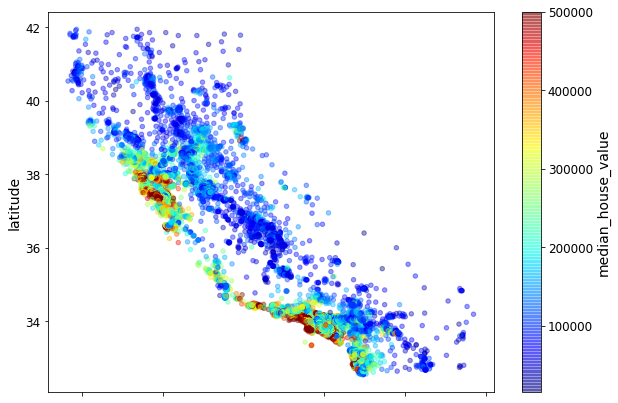

In [82]:
# We can add complexity by having the parameter c indicate a feature to use
# in creating a heatmap of feature values across the data points.
# Here, we visualize "median_house_value" because this is the feature we will
# be trying to predict.
# To make the map easier to view, we set a larger figsize and increase alpha.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

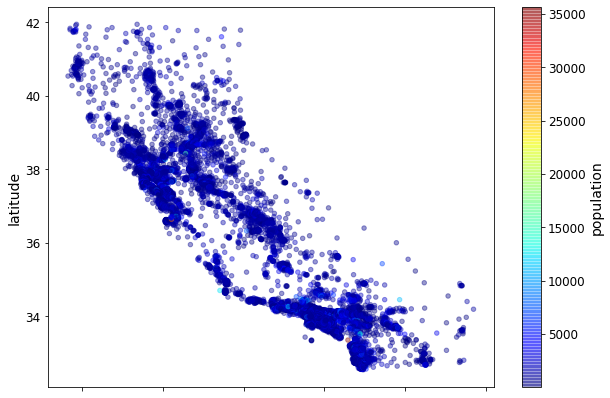

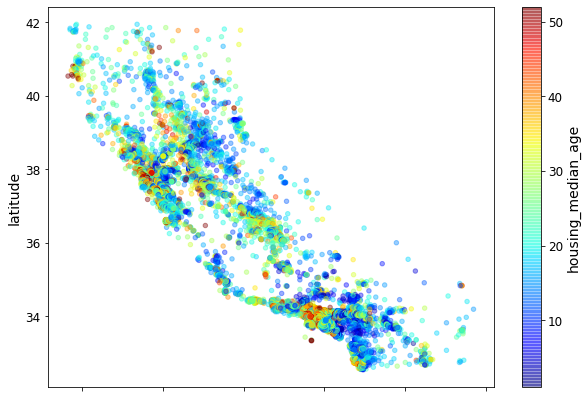

In [83]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    figsize=(10,7), c="population", cmap=plt.get_cmap("jet"), colorbar=True)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    figsize=(10,7), c="housing_median_age", cmap=plt.get_cmap("jet"), colorbar=True)

"""
TODO: Try visualizing some of the other features with a heatmap such as population and housing_median_age

QUESTION: Why do some features such as population seem to create heatmaps that are all a single color while features such as median_house_value and housing_median_age produce heatmaps that seem to draw from the entire color range?

ANSWER: This is because the values for population is right-skewed and most of the data points of population are concentrated in a narrow range that is only a small portion of the entire data range. We can see from the heatmap of population that the color representation of the values central to the dark blue color of low ranged values with little variation. On the other hand, the values for housing_median_age are more normalized compared to the values of population and more evenly spreaded within the range. 

"""

In [84]:
# It is worth checking if the feature we are trying to predict, median_house_value, can
# have its value entirely predicted from one of the other feature values we have.
# The corr() function gives us a correlation matrix indicating how highly each feature is
# correlated with each other. We store it in a variable corr_matrix.
corr_matrix = housing.corr()

# corr_matrix["median_house_value"] is the column just for the median_house_value feature
# the .sort_values() function prints those values out in sorted order, the argument indicates
# to not print them in ascending order (that is, to print them in descending order).

# We see that this feature is perfectly correlated with itself, just under 70% correlated
# with median_income, and very slightly correlated (or negatively correlated) with the other
# features.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [85]:
# Having reviewed the data and its properties, we will begin trying to learn with it and in
# doing so we will see how we have to work with the data in new ways to account for these observations.

In [86]:
# NOTE: Our data still has the feature we are trying to learn in the same table as the features
# we are using for learning; our input and output are combined. We need to take the feature
# we are trying to learn out of the table we will use as input and put them instead in an
# array to treat as our output.

housing_input = housing.drop("ocean_proximity", axis=1)
housing_input = housing_input.dropna(how='any',axis=1)
housing_output = housing_input["median_house_value"].copy()
housing_input = housing_input.drop("median_house_value", axis=1)

In [87]:
col_mask=housing_input.isnull().any(axis=0) 
row_mask=housing_input.isnull().any(axis=1)
housing_input.loc[row_mask,col_mask]

""


In [88]:
# Given our separate input features and output target values, split the data into training
# and test sets as we have done before.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_input, housing_output, random_state=42)

# Check how many examples ended up in the training set and test set
print(len(X_train), "train +", len(X_test), "test")

15480 train + 5160 test


In [89]:
# We are predicting a continuous value so we will use linear regression.
# Create the model, fit it to the training data, and score it.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))
# NOTE: as given, this will produce an error

Training set score: 0.632
Test set score: 0.633


"""
You should have produced an error message which says that, when trying to fit the training data,
a string could not be convered to a float. The specific string that it cannot convert is '<1H OCEAN'
which you should recognize as one of the categorical data values for the "ocean_proximity" feature.
This error message is telling you that linear regression cannot fit a model to the data because it
contains non-numerical data that it cannot use in calculating a linear function.

The solution will be to remove the column corresponding to the "ocean_proximity" feature
from the input data. For now, we will not take that information into account when trying to
learn to predict the median home value.

Note that if you rerun the code to remove a feature from the data after it has already run, you
will get an error that the feature is no longer available to be removed. You may need to recreate
your input and output arrays before re-running your code to remove the feature.

TODO: Add code in the cells above to drop the ocean_proximity feature from the data and then train
the linear regression model on a new training set. Be thoughtful about where you place this new
code. Make sure the test set ALSO has the ocean_proximity feature removed from it. Note here which
code you added to make this change.

NOTES: I added the line of code "housing_input = housing_input.drop("ocean_proximity", axis=1)" right below where the same code is used to remove the data for median_house_value from the input dataset.

"""

"""

Dropping the ocean_proximity feature should fix the first error you received, but you should now get a new error saying that the input contains NaN, infinity, or overly large values. In this case, it
will turn out the problem is we have null values for some of our examples - there is a feature for which we have missing data values.

TODO: Looking back in our analysis, figure out which feature has these null values. Go ahead and also remove that feature from our input (both in the training set and in the test set). Again, train the linear regression model on this further restricted data. Note here which code you added to make this change.

NOTES: I used multiple lines of codes right after creating the input and output variables to check for any NaN values in any of the features. I see that total_bedrooms have 207 NaN values. 
I rearranged some lines of code above so that the housing_input object will beremoved the ocean_proximity feature. Then, I added the line of code "housing_input = housing_input.dropna(how='any',axis=1)" to remove any NaN columns from the input object. The housing_output was generated from the input variable. Finally, I removed the median_house_value from the input object. 

"""

"""

QUESTION: How well is our linear regression model able to do, given the removed features and no regularlization or tuning of our model How good or bad does this seem to be?

ANSWER: With the training accuracy of 0.634 and the testing accuracy of 0.646, I think that the linear regression model does not train well. The performance of the model's prediction is not so great since the model is only able to predict less than 70% of the data accurately. Though, the testing accuracy is greater than the testing accuracy. 

"""

In [90]:
# Having successfully built a model, we would like to improve the model. We will start by trying
# to reintroduce the features that we had to drop from the data.

In [91]:
"""
We dropped the ocean_proximity feature because it included text values rather than numerical values.
"One Hot Encoding" is a pre-processing step that we can apply to a dataset that contains both numerical
and categorical values that will take any column storing categorical data and expand it into multiple
columns each of which corresponds to one of the possible categorical values and now stores either a
1 or a 0 to indicate whether that category was the one represented in the original data.

The following code illustrates how to take our original dataset and apply one hot encoding.
"""

# recreate the housing_input and housing_output sets from the original data in case they were changed
# in our prior efforts to learn over this data
housing_input = housing.drop("median_house_value", axis=1)
housing_output = housing["median_house_value"].copy()

# housing_input includes categorical data in the ocean_proximity feature
# view the first few rows to confirm this
housing_input.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [92]:
# apply one-hot-encoding using the .get_dummies() method of the pandas library
# provide the housing_input data as the input to the function
encoded_input = pd.get_dummies(housing_input)

# print out the first few rows of the new table "encoded_input" which has has
# one-hot-encoding applied
encoded_input.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


"""

QUESTION: How many features does the data now have? Which features are no longer in the data? Which features have been added?

ANSWER: The data now has 13 features. The feature ocean_proximity is no longer in the data. The newly added features are as follows: ocean_proximity_<1H OCEAN, ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN. 

"""

In [93]:
encoded_input[:] = np.nan_to_num(encoded_input)
X_train, X_test, y_train, y_test = train_test_split(encoded_input, housing_output, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.647
Test set score: 0.628


"""

TODO: In this cell (or the next one) construct a training and test set using the one-hot-encoded data and then fit a linear regresson model to it and score it over the training and test sets.

QUESTION: Does incorporating the one-hot-encoded versions of the ocean_proximity feature help the model perform better? To what extent?

ANSWER: The one-hot-encoded versions of the ocean_proximity feature did not help the model predict better. The training accuracy imporved by 1.3% and the testing accuracy decreased by 1.8%.

"""

In [94]:
imf_input = imf.drop("median_house_value", axis=1)
imf_input = imf.drop("median_house_value", axis=1)
imf_input = pd.get_dummies(housing_input)

mean_input = encoded_input.fillna(encoded_input.mean())

X_train, X_test, y_train, y_test = train_test_split(mean_input, housing_output, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.647
Test set score: 0.638


"""

We also dropped a feature that had NaN values for some examples. Rather than ignoring that data for
every example, we would prefer to take the examples that did not have a value available and give it a default value. The average value across the data set would be a reasonable default value.

Given a dataframe housing_input with NaN values, the following line of code will take it and fill in the mean values, storing the resulting new table in "mean_input"

mean_input = housing_input.fillna(housing_input.mean())


TODO: In this cell (or the next one) construct an input data set based on housing_input that has
default values filled in for all NaN values and then applies one-hot-encoding to address the
categorical features. Construct a training and test set, fit a model, and score it.

QUESTION: Does reintroducing both of our dropped features help the model perform better? To what extent?

ANSWER: Reintroducing both of our dropped features did help the model perform better, but the improvement was not significant. The testing accuracy improved to 63.8% and the training accuracy remained constant. 

"""

In [95]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
expandedFeatures = MinMaxScaler().fit_transform(mean_input)
expandedFeatures = PolynomialFeatures(include_bias=False).fit_transform(expandedFeatures)

expandedFeatures.shape

(20640, 104)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(expandedFeatures, housing_output, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.716
Test set score: -242481707739067296.000


"""

TODO: Recall that when we attempted to learn the Boston Housing dataset, we found that it was useful to create an expanded feature set that included all pair-wise combinations of features. Attempt
that approach here to improve the accuracy of our model. Expand the feature set to an input matrix that has already had the two previously omitted features added back in with one-hot-encoding applied.

QUESTION: After expanding the feature set, how many features are there now in the training data?

ANSWER: After expanding the feature set, there are 104 features in the training data. 

QUESTION: Does expanding the feature set improve the learning of the model? To what extent? What do you observe about the score on the training set versus the test set and what might explain this?

ANSWER: By expanding the feature set, the model learned better by about 6.9%. Though the training score seems reasonable, the testing score of -242481707739067296 is quite unexpected. One possible explanantion for this is that while the model we are trying to predict is a linear model, the expaneded feature model uses polynomial features with a degree of 2, which causes the issue of under-fitting. 

"""

In [97]:
ridge = Ridge();
ridge.fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

Training set score: 0.687
Test set score: 0.677


In [98]:
from sklearn.linear_model import Ridge

alp = np.linspace(0,21,200)
for i in alp: 
    ridge = Ridge(alpha=i);
    ridge.fit(X_train, y_train)
    print("a: ", i)
    print(" Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
    print(" Test set score: {:.3f}".format(ridge.score(X_test, y_test)))
    print(round(ridge.score(X_train, y_train) - ridge.score(X_test, y_test), 4))

a:  0.0
 Training set score: 0.713
 Test set score: -1661635402546259456.000
1.6616354025462595e+18
a:  0.10552763819095477
 Training set score: 0.707
 Test set score: 0.681
0.0254
a:  0.21105527638190955
 Training set score: 0.703
 Test set score: 0.681
0.0216
a:  0.3165829145728643
 Training set score: 0.700
 Test set score: 0.681
0.0187
a:  0.4221105527638191
 Training set score: 0.697
 Test set score: 0.680
0.0166
a:  0.5276381909547738
 Training set score: 0.695
 Test set score: 0.680
0.0149
a:  0.6331658291457286
 Training set score: 0.693
 Test set score: 0.679
0.0135
a:  0.7386934673366834
 Training set score: 0.691
 Test set score: 0.678
0.0124
a:  0.8442211055276382
 Training set score: 0.689
 Test set score: 0.678
0.0115
a:  0.949748743718593
 Training set score: 0.688
 Test set score: 0.677
0.0107
a:  1.0552763819095476
 Training set score: 0.686
 Test set score: 0.676
0.01
a:  1.1608040201005025
 Training set score: 0.685
 Test set score: 0.676
0.0094
a:  1.266331658291457

a:  10.974874371859297
 Training set score: 0.651
 Test set score: 0.649
0.002
a:  11.080402010050252
 Training set score: 0.651
 Test set score: 0.649
0.002
a:  11.185929648241206
 Training set score: 0.651
 Test set score: 0.649
0.002
a:  11.291457286432161
 Training set score: 0.651
 Test set score: 0.649
0.002
a:  11.396984924623116
 Training set score: 0.651
 Test set score: 0.649
0.002
a:  11.50251256281407
 Training set score: 0.650
 Test set score: 0.648
0.002
a:  11.608040201005025
 Training set score: 0.650
 Test set score: 0.648
0.002
a:  11.71356783919598
 Training set score: 0.650
 Test set score: 0.648
0.002
a:  11.819095477386934
 Training set score: 0.650
 Test set score: 0.648
0.002
a:  11.924623115577889
 Training set score: 0.650
 Test set score: 0.648
0.002
a:  12.030150753768844
 Training set score: 0.650
 Test set score: 0.648
0.002
a:  12.135678391959798
 Training set score: 0.649
 Test set score: 0.648
0.002
a:  12.241206030150753
 Training set score: 0.649
 Tes

"""

TODO: In addition to expanding the feature set to include combined polynomial features, we also saw that linear regression can be improved by applying ridge regression and finding a good regularization parameter. Attempt that approach here to improve the accuracy of our model. Experiment with alpha values to find the model that fits as well as possible without overfitting.

QUESTION: What alpha value did you end up selecting? Why do you believe this is a good alpha value
that lets the model perform as well as possible without overfitting?

ANSWER: I think that 0.10552763819095477 is a good alpha value because the training accuracy is the greatest among the other scores with different alpha values. Though there is the largest discrepancy between the training and testing scores with this alpha value, I think that it is not large enough to cause an issue of overfitting. 

"""